# Numerical integration

## The fundamental theorem of calculus
If some function $f(x)$ is continuous over the range $[a,b]$
then the integral can be expressed in terms of the antiderivative $F(x)$ evaluated at the endpoints

 $$\int_a^b f(x) \, dx = F(b) - F(a) $$
 
However, it is not always easy to determine $F$ for a given $f$.

In [4]:
# Set up a reference integral using the exponential.
#

import numpy as np
def integrand_exp(x):
    return np.exp(x)
#help(np.exp)
def indefinite_integral_exp(x):
    return np.exp(x)

def definite_integral_exp(a,b):
    return indefinite_integral_exp(b) - indefinite_integral_exp(a)

print( definite_integral_exp(0.0, 1.0) )
print( np.e - 1.0)

1.71828182846
1.718281828459045


## Rectangular rule

The simplest way to estimate the area under a curve is to break it down into $N$ equal sub-intervals and evaluate $f(x_i)$ at the midpoint of each interval

 $$\int_a^b f(x) \, dx \approx \frac{b-a}{n} \left[\, f(x_1) + f(x_2) \ldots + f(x_n) \,\right] $$

The area of each rectangle is height $\times$ width, and if we add a lot of narrow rectangles we might reasonably expect to converge on the correct result.

In [66]:
limits = [0.0, 1.0]
width = limits[1] - limits[0]
xmid = ( limits[1] + limits[0] ) / 2.0
ymid = integrand_exp( xmid ) 
rectangular_integral = width * ymid
print( 'error: ', rectangular_integral - (np.e - 1.0) ) 

error:  -0.0695605577589


## Trapezoidal rule

A better estimate can usually be obtained by calculating the area of the trapezoid for each of $N$ equal sub-intervals

 $$\int_a^b f(x) \, dx \approx \frac{b-a}{2n} \left[\, f(x_0) + 2 f(x_1) + 2 f(x_2) \ldots + 2 f(x_{n-1}) + f(x_n) \,\right] $$

In [67]:
limits = [0.0, 1.0]
width = limits[1] - limits[0]
ylower = integrand_exp( limits[0] ) 
yupper = integrand_exp( limits[1] ) 
rectangular_integral = width * ylower
triangular_integral = 0.5*width* (yupper-ylower) 
trapezoidal_integral = rectangular_integral + triangular_integral
print( 'error: ', trapezoidal_integral - (np.e - 1.0) ) 

error:  0.14085908577


## Simpson's rule

Two sub intervals from $x_0$ to $x_1$ and $x_1$ to $x_2$ can be used to form two trapezoids.  An alternative is to find the unique 2nd order polynomial (parabola) which passes through all three points $y_0, y_1, y_2$.

Once we know the polynomial coefficients it is easy tp determine the area under that part of the curve

 $$\int_{x_0}^{x_2} (A x^2 + B x + C) \, dx = \frac{x_2 - x_0}{3} \left[\, y_0 + 4 y_1 + y_2  \,\right] $$ 

If the interval is broken down into an even number of sub-intervals we can obtain a good estimate of the integral

 $$\int_a^b f(x) \, dx \approx \frac{b-a}{3n} \left[\, y_0 + 4 y_1 + 2 y_2 + 4 y_3 \ldots + 2 y_{n-2} + 4 y_{n-1} + y_n \,\right] $$ 

## Seeing is believing



errors:  0.14085908577 0.14085908577
errors:  0.0356492640058 0.000579323417548
errors:  0.00894007609847 8.59465712821e-07
errors:  0.00099426098734 1.55431223448e-15


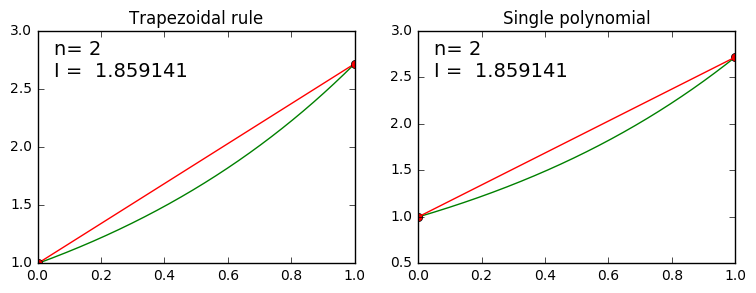

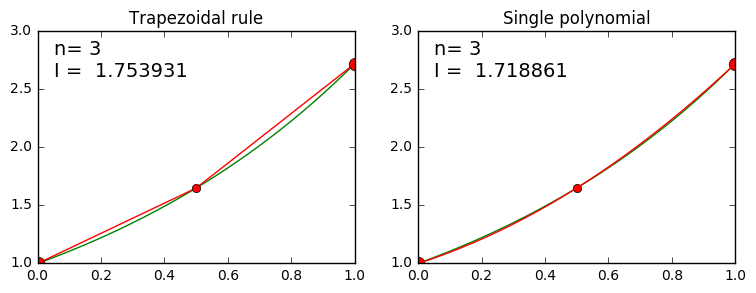

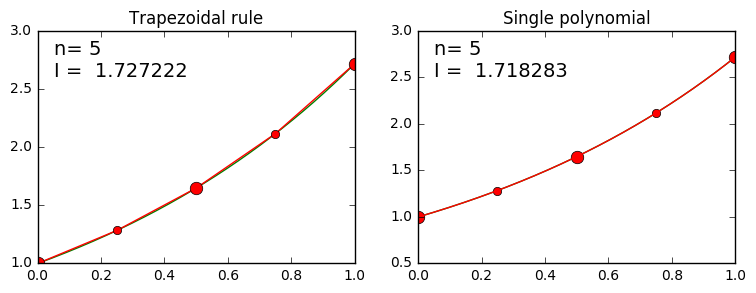

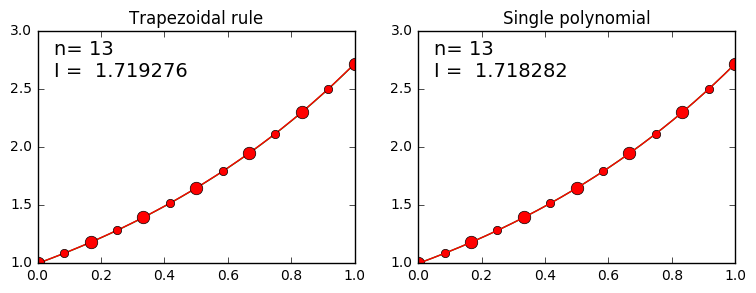

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

def numint_plot_pair( integrand, limits, degree=2): 
    """
    Generate numerical integrals and plots for Trapezoidal rules
    and high order polynomial
    """

    # many closely spaced points for reference curve
    xx = np.linspace(limits[0], limits[1], 1001)
    yy = integrand( xx ) 

    # set up two plots side-by-side
    fig, axes = plt.subplots(1,2, figsize=(9,3) )

    # evaluate and show 2^n points
    nn = degree
    xn = np.linspace(limits[0], limits[1], nn) #2**nn)
    yn = integrand( xn ) 
    axes[0].plot(xx, yy, 'g-', lw=1)
    axes[0].plot(xn, yn, 'ro-')
    if (degree>2): axes[0].plot(xn[::2], yn[::2], 'ro', ms=9)    
    
    # estimate and plot integral for trapezoid
    tmp = np.sum(yn) - 0.5*yn[0] - 0.5*yn[-1]
    trapezoidal_integral = (limits[1]-limits[0]) / (len(xn)-1.0) * tmp
    axes[0].text(0.05, 0.80, 'n= {} \nI = {:9.6f}'.format(degree, trapezoidal_integral), transform=axes[0].transAxes, fontsize=14) #,verticalalignment='top', bbox=props)    
    axes[0].set_title('Trapezoidal rule')

    # fit and plot polynomial curve
    axes[1].plot(xx, yy, 'g-', lw=1)
    axes[1].plot(xn, yn, 'ro')
    if (degree>2): axes[1].plot(xn[::2], yn[::2], 'ro', ms=9)    
    poly_coeff = np.polyfit(xn, yn, len(xn)-1 )
    xp = xx.copy()
    yp = np.polyval(poly_coeff, xp)
    axes[1].plot(xp, yp, 'r-')
    
    # estimate and plot integral for polynomial
    poly_int_coeff = np.polyint(poly_coeff)
    poly_int_values = np.polyval( poly_int_coeff, limits)
    polynomial_integral = poly_int_values[1] - poly_int_values[0]
    axes[1].text(0.05, 0.80, 'n= {} \nI = {:9.6f}'.format(degree, polynomial_integral), transform=axes[1].transAxes, fontsize=14) #,verticalalignment='top', bbox=props)    
    axes[1].set_title('Single polynomial')
    
    return trapezoidal_integral, polynomial_integral

for n in [2,3,5,13]:
    trap,poly = numint_plot_pair( integrand_exp, limits, degree=n)
    print( 'errors: ', trap - (np.e - 1.0), poly - (np.e - 1.0) )

## Romberg Integration

If we apply trapezoidal integration to successively smaller intervals then the errors should presumably decrease as the step size $h$ approaches zero.  That would suggest that we might take the sequence of improving estimates (first column under "results" in table below) and extrapolate to $h=0$.  This actually works, but we can do better.

The trapezoidal sequence can also be used to calculate a sequence of higher order estimates (last row in table below) for the smallest spacing.  What if we extrapolate this sequence to infinity?  This works sometimes, but not always.

Romberg integration effectively does both.  The algorithm generates a triangular table (below) where the diagonal contains the highest order for each interval spacing.  This is arguably the best possible estimate given the available information.  By extrapolating to $h=0$ we will usually get a few more significant figures than would be provided without extrapolation.

In [42]:
from scipy import integrate

limits = [0, 1.0]
result = integrate.romberg( integrand_exp, limits[0], limits[1], show=True, vec_func=True)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7fde90211488> from [0, 1.0]

 Steps  StepSize   Results
     1  1.000000  1.859141 
     2  0.500000  1.753931  1.718861 
     4  0.250000  1.727222  1.718319  1.718283 
     8  0.125000  1.720519  1.718284  1.718282  1.718282 
    16  0.062500  1.718841  1.718282  1.718282  1.718282  1.718282 

The final result is 1.71828182846 after 17 function evaluations.


## More challenging functions

Not surprisingly, the single polynomial approach does not work well for functions are not well approximated by a single polynomial.  However, if a function can be divided up into several sub-intervals, each of which is approximately polynomial in nature, then numerical integration with Simposon's rule can be very effective.

/home/bjackel/miniconda3/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


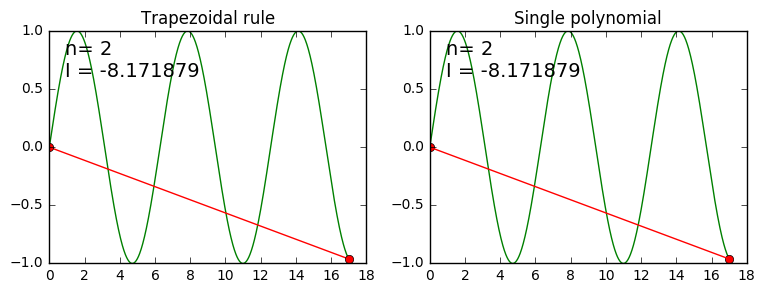

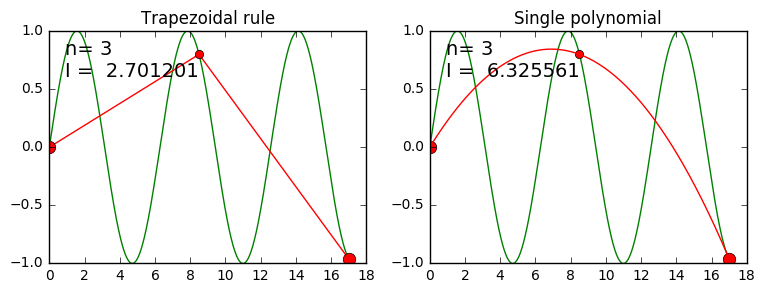

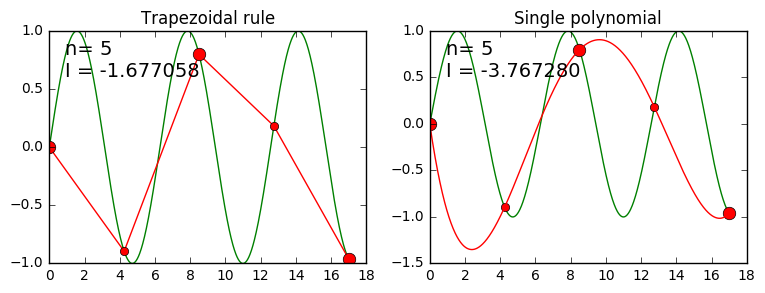

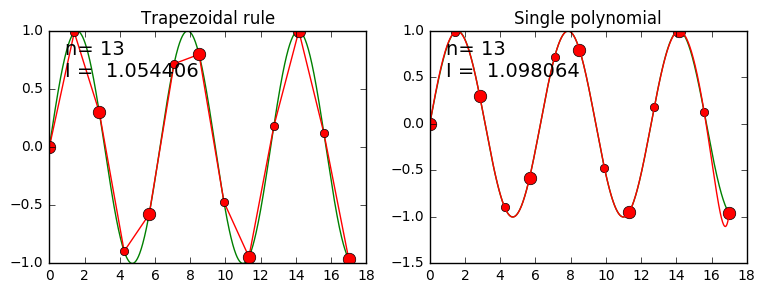

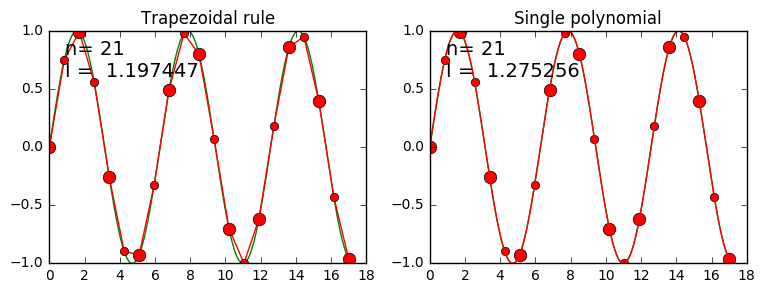

In [63]:
def integrand_sin(x, a=1.0):
    return np.sin(a*x)


limits = [0,17]                  
numint_plot_pair( integrand_sin, limits, degree=2)                  
numint_plot_pair( integrand_sin, limits, degree=3)  
numint_plot_pair( integrand_sin, limits, degree=5) 
numint_plot_pair( integrand_sin, limits, degree=13) 
numint_plot_pair( integrand_sin, limits, degree=21)

In [37]:
from scipy import integrate
result = integrate.romberg( integrand_sin, limits[0], limits[1], show=True, vec_func=True)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7fde90578c80> from [0, 17]

 Steps  StepSize   Results
     1 17.000000 -8.171879 
     2  8.500000  2.701201  6.325561 
     4  4.250000 -1.677058 -3.136478 -3.767280 
     8  2.125000  0.754826  1.565454  1.878916  1.968538 
    16  1.062500  1.152882  1.285568  1.266909  1.257194  1.254405 
    32  0.531250  1.245031  1.275747  1.275092  1.275222  1.275293  1.275313 
    64  0.265625  1.267657  1.275199  1.275162  1.275163  1.275163  1.275163  1.275163 
   128  0.132812  1.273288  1.275166  1.275163  1.275163  1.275163  1.275163  1.275163  1.275163 
   256  0.066406  1.274695  1.275163  1.275163  1.275163  1.275163  1.275163  1.275163  1.275163  1.275163 

The final result is 1.27516333805 after 257 function evaluations.
